In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

def make_getters():
    getters = []

    for v in range(3):
        getters.append(lambda x: x['v'][v])
    
    for a in range(3):
        getters.append(lambda x: x['a'][v])

    for x1 in range(4):
        for x2 in range(3):
            getters.append(lambda x: x['x'][x1][x2])

    for gt1 in range(7):
        for gt2 in range(3):
            getters.append(lambda x: x['gt'][gt1][gt2])
    return getters

def check_triplet(a, b):
    

    if a[0] == b[0] and a[1] == b[1] and a[2] == b[2]:
        return True
    
    return False


def cross_check(entry):
    checked = 0
    same = 0
    for gt1 in range(len(entry['gt'])):
        gt = entry['gt'][gt1]
        checked += 1
        if check_triplet(gt, entry['a']):
            print(f"Gt{gt1} and acceleration equal")
            same += 1
        checked += 1
        if check_triplet(gt, entry['v']):
            print(f"Gt{gt1} and velocity equal")
            same += 1

        for x in range(4):
            checked += 1
            if check_triplet(gt, entry['x'][x]):
                print(f"Gt{gt1} and x{x} equal")   
                same += 1
    return checked, same


def preprocess(data):
    keys = dict(data).keys()

    columns = []
    for i in range(3):
        columns.append(f"a_{i}")
        columns.append(f"v_{i}")
        for j in range(4):
            columns.append(f"x_{j}_{i}") 
        for j in range(7):
            columns.append(f"gt_{j}_{i}")
    
    out = []

    for key in keys:
        entry = data[key]
        d = dict()
        for i in range(3):
            d[f"a_{i}"] = entry['a'][i]
            d[f"v_{i}"] = entry['v'][i]
            for j in range(4):
                d[f"x_{j}_{i}"] = entry['x'][j][i]
            for j in range(len(entry['gt'])):
                d[f"gt_{j}_{i}"] = entry['gt'][j][i]
        out.append(d)
    
    out = pd.DataFrame(out)
    return out

def check_leakage(data):
    keys = dict(data).keys() 
    
    total_checked = 0
    total_same = 0

    for key in keys:
        checked, same = cross_check(data[key])

        total_checked += checked
        total_same += same
    print(f"Total checked: {total_checked}\nTotal same: {total_same}\nRatio:{total_same/total_checked}")
    
def load_nuscene():
    with open("./stp3_val/data_nuscene.pkl", 'rb') as f:
        data = pickle.load(f)
    return data



def load_carla():
    with open("./data2.pkl", "rb") as f:
        data = list(pickle.load(f))
        data = {k: v for k, v in enumerate(data)}
    return data

In [2]:
data = load_carla()
df = preprocess(data)
corr = df.corr()
print(corr)

             a_0       v_0     x_0_0     x_1_0     x_2_0     x_3_0    gt_0_0  \
a_0     1.000000  0.102528 -0.016664  0.102047  0.144921  0.164372  0.161493   
v_0     0.102528  1.000000 -0.996010 -0.974534 -0.947933 -0.919870  0.994748   
x_0_0  -0.016664 -0.996010  1.000000  0.987362  0.963809  0.937055 -0.984752   
x_1_0   0.102047 -0.974534  0.987362  1.000000  0.990471  0.970325 -0.958250   
x_2_0   0.144921 -0.947933  0.963809  0.990471  1.000000  0.992292 -0.929545   
x_3_0   0.164372 -0.919870  0.937055  0.970325  0.992292  1.000000 -0.900404   
gt_0_0  0.161493  0.994748 -0.984752 -0.958250 -0.929545 -0.900404  1.000000   
gt_1_0  0.197906  0.971790 -0.957508 -0.926798 -0.896128 -0.865482  0.987111   
gt_2_0  0.211044  0.943078 -0.926869 -0.894119 -0.862176 -0.830340  0.962262   
gt_3_0  0.216126  0.911636 -0.894436 -0.860274 -0.827233 -0.794641  0.932755   
gt_4_0  0.218541  0.878375 -0.860456 -0.825178 -0.791402 -0.758651  0.900725   
gt_5_0  0.221057  0.843597 -0.825194 -0.

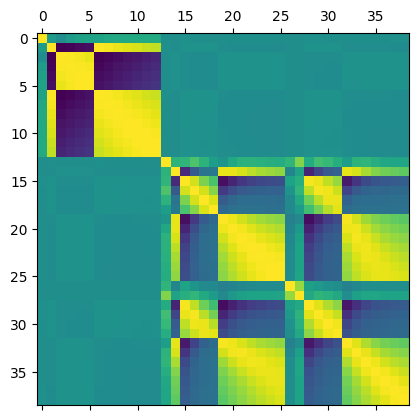

In [3]:
plt.matshow(corr)
plt.show()

<AxesSubplot:>

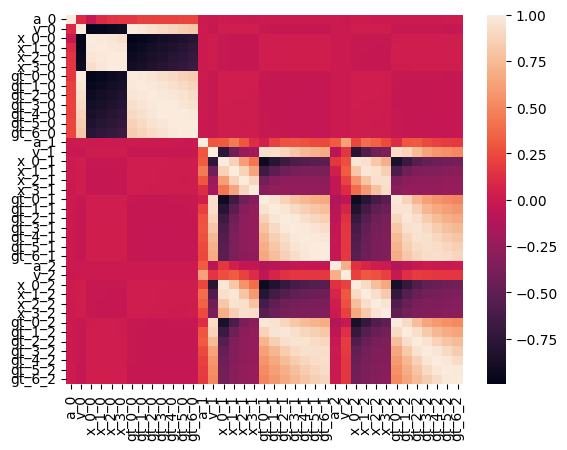

In [4]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)